In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
from time import time

In [2]:
warnings.filterwarnings("ignore")
iris_data = pd.read_csv('iris.data', header = None)
iris_data.columns = ['sepal_length',
               'sepal_width',
               'petal_length',
               'petal_width',
                'cluster']
iris_data

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#資料前處理
le=LabelEncoder()
for col in iris_data[['cluster', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]:
    iris_data[col]=le.fit_transform(iris_data[col])
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sepal_length  150 non-null    int64
 1   sepal_width   150 non-null    int64
 2   petal_length  150 non-null    int64
 3   petal_width   150 non-null    int64
 4   cluster       150 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 5.4 KB


In [4]:
t= time()

In [5]:
X= iris_data.drop('cluster', axis= 1)
Y= iris_data['cluster']

In [6]:
#求眾數
def mode(a):
    counts = np.bincount(a)  
    return np.argmax(counts)

In [7]:
#purity計算
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [8]:
def Cen():
    Centroids = (X.sample(n=3))


    diff = 1
    j=0

    while(diff!=0):
        XD=X
        i=1
        for index1,row_c in Centroids.iterrows():
            ED=[]
            for index2,row_d in XD.iterrows():
                d1=(row_c["petal_length"]-row_d["petal_length"])**2
                d2=(row_c["petal_width"]-row_d["petal_width"])**2
                d=np.sqrt(d1+d2)
                ED.append(d)
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():
            min_dist=row[1]
            pos=1
            for i in range(3):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)
        X["cluster"]=C
        Centroids_new = X.groupby(["cluster"]).mean()[["petal_width","petal_length"]]
        if j == 0:
            diff=1
            j=j+1
        else:
            diff = (Centroids_new['petal_width'] - Centroids['petal_width']).sum() + (Centroids_new['petal_length'] - Centroids['petal_length']).sum()
            print(diff.sum())
        Centroids = X.groupby(["cluster"]).mean()[["petal_width","petal_length"]]

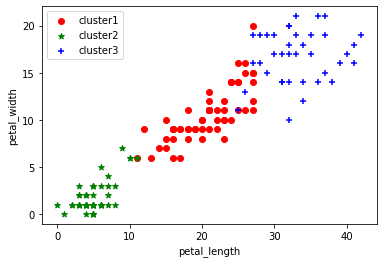

Purity: 0.8666666666666667
done in 0.21984076499938965 seconds


In [9]:
#資料分三群

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = kmeans.cluster_centers_
for i in range(3):
        index = Y == i
        p = kmeans.predict(X)
        pp = mode(p) 
        # 相應的調整類別標號，以正確預測

K_y_pre = kmeans.predict(X)

x0 = X[K_y_pre == 0]
x1 = X[K_y_pre == 1]
x2 = X[K_y_pre == 2]
plt.scatter(x0['petal_length'], x0['petal_width'], c="red", marker='o', label='cluster1')  
plt.scatter(x1['petal_length'], x1['petal_width'], c="green", marker='*', label='cluster2')  
plt.scatter(x2['petal_length'], x2['petal_width'], c="blue", marker='+', label='cluster3')  
plt.xlabel('petal_length')  
plt.ylabel('petal_width')  
plt.legend(loc=2)  
plt.show()  

####################################################
#純度
K_purity = purity_score(Y, K_y_pre)
print('Purity:', K_purity)
####################################################
#時間
print("done in {0} seconds".format(time() - t))

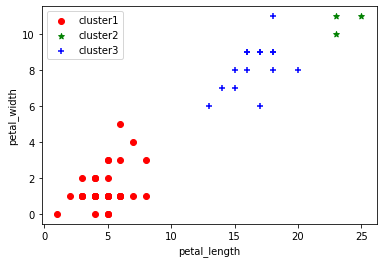

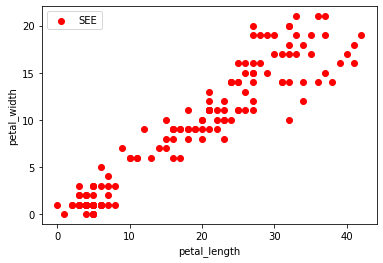

Purity: 0.84
done in 0.4629395008087158 seconds


In [10]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit(X)
label_pred = dbscan.labels_

DB_purity = purity_score(Y, label_pred)

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0['petal_length'], x0['petal_width'], c="red", marker='o', label='cluster1')  
plt.scatter(x1['petal_length'], x1['petal_width'], c="green", marker='*', label='cluster2')  
plt.scatter(x2['petal_length'], x2['petal_width'], c="blue", marker='+', label='cluster3')  
plt.xlabel('petal_length')  
plt.ylabel('petal_width')  
plt.legend(loc=2)  
plt.show()  
plt.scatter(X['petal_length'], X['petal_width'], c="red", marker='o', label='SEE')  
plt.xlabel('petal_length')  
plt.ylabel('petal_width')  
plt.legend(loc=2)  
plt.show()  

print('Purity:', DB_purity)

####################################################
#時間
print("done in {0} seconds".format(time() - t))

Purity: 0.8933333333333333
done in 0.49113035202026367 seconds


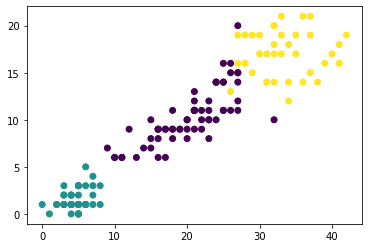

In [11]:
#階層式分群
ml=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
ml.fit_predict(X)
c=ml.fit_predict(X)
print(plt.scatter(X['petal_length'],X['petal_width'],c=ml.fit_predict(X)))
H_purity = purity_score(Y, c)
print('Purity:', H_purity)

####################################################
#時間
print("done in {0} seconds".format(time() - t))

Text(0.5, 1.0, 'Hierarchical Clustering')


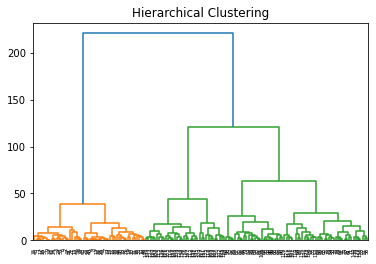

In [12]:
#分層樹
dis=sch.linkage(X,metric='euclidean',method='ward')
sch.dendrogram(dis)
print(plt.title('Hierarchical Clustering'))

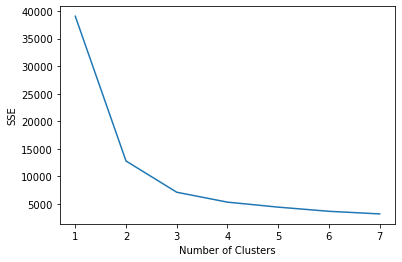

In [13]:
distortions = []
for i in range(1,8):
    km= KMeans(n_clusters = i, init= "k-means++", n_init= 10, max_iter= 300, tol= 1e-4, random_state= 0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,8), distortions)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()